In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def moving_average_model(train_data, test_data, feature, window_size):
    
    # Calculate the moving average on training data
    train_data['Moving_Avg'] = train_data[feature].rolling(window=window_size).mean()
    
    # Drop rows with NaN values due to the rolling window
    train_data.dropna(inplace=True)

    # Apply the moving average model to the testing data
    test_data['Moving_Avg'] = test_data[feature].rolling(window=window_size).mean()
    
    # Drop rows with NaN values due to the rolling window
    test_data.dropna(inplace=True)
    
    return test_data['Moving_Avg']

def plot_actual_vs_predicted(train_actual, test_actual, predicted, feature_name):
    plt.figure(figsize=(10, 6))
    plt.plot(train_actual.index, train_actual.values, label='Training Data')
    plt.plot(test_actual.index, test_actual.values, label='Testing Data')
    
    # Reindex the predicted values to match the index of the testing data
    predicted_reindexed = predicted.reindex(test_actual.index)
    plt.plot(test_actual.index, predicted_reindexed, label='Predicted')
    
    plt.title('Actual vs. Predicted {}'.format(feature_name))
    plt.xlabel('Date')
    plt.ylabel(feature_name)
    plt.legend()
    plt.show()


In [3]:
#works on manual, jaipur and delhi datasets Visibility_km maxtempm

dataset_file = input("Enter the file name of the dataset (CSV format): ")

# Load dataset
dataset = pd.read_csv(dataset_file)

first_column_name = dataset.columns[0]
dataset.rename(columns={first_column_name: first_column_name.lower()}, inplace=True)

if 'date' in dataset.columns:
        dataset['date'] = pd.to_datetime(dataset['date'])
        dataset.set_index('date', inplace=True)
elif 'date/time' in dataset.columns:
        dataset['date/time'] = pd.to_datetime(dataset['date/time'])
        dataset.set_index('date/time', inplace=True)
else:
    print("No suitable date or date/time column found in the dataset.")

dataset.sort_index(inplace=True)

print("Available features in the dataset:")
print(dataset.columns)


Available features in the dataset:
Index(['MinTemp', 'MaxTemp', 'AvgTemp', 'Sunrise', 'Sunset'], dtype='object')


In [4]:
feature_to_predict = input("Enter the name of the feature you want to predict: ")

# Take input for the moving average window size
window_size = int(input("Enter the moving average window size: "))

In [5]:
train_data, test_data = train_test_split(dataset, test_size=0.2, shuffle=False)

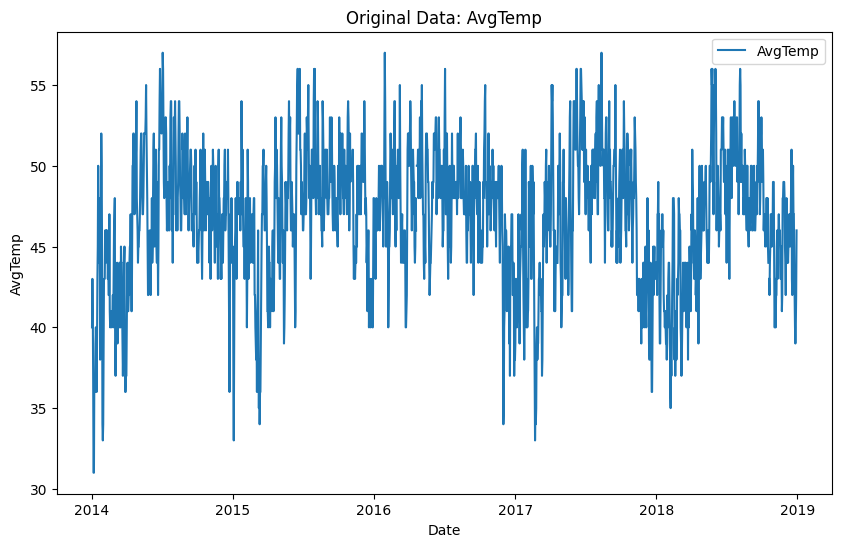

In [6]:
# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(dataset.index, dataset[feature_to_predict], label=feature_to_predict)
plt.title('Original Data: {}'.format(feature_to_predict))
plt.xlabel('Date')
plt.ylabel(feature_to_predict)
plt.legend()
plt.show()

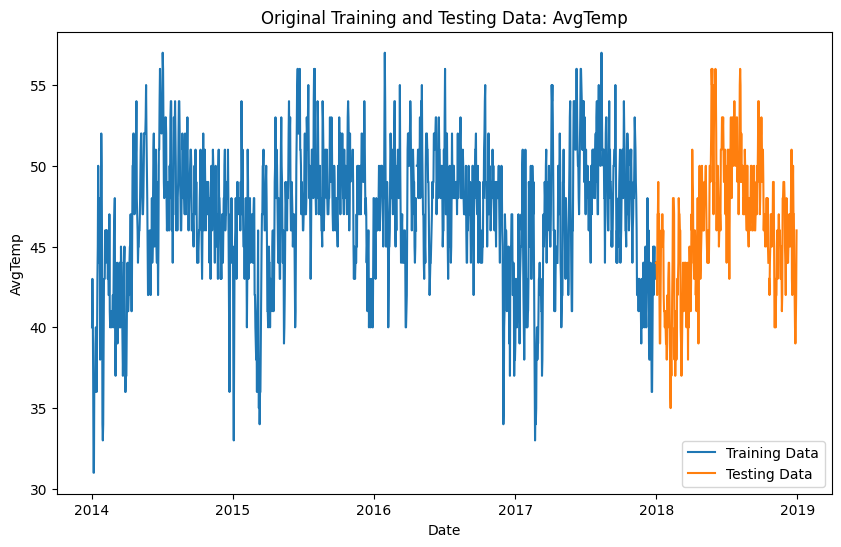

In [7]:
# Plot original training and testing data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[feature_to_predict], label='Training Data')
plt.plot(test_data.index, test_data[feature_to_predict], label='Testing Data')
plt.title('Original Training and Testing Data: {}'.format(feature_to_predict))
plt.xlabel('Date')
plt.ylabel(feature_to_predict)
plt.legend()
plt.show()

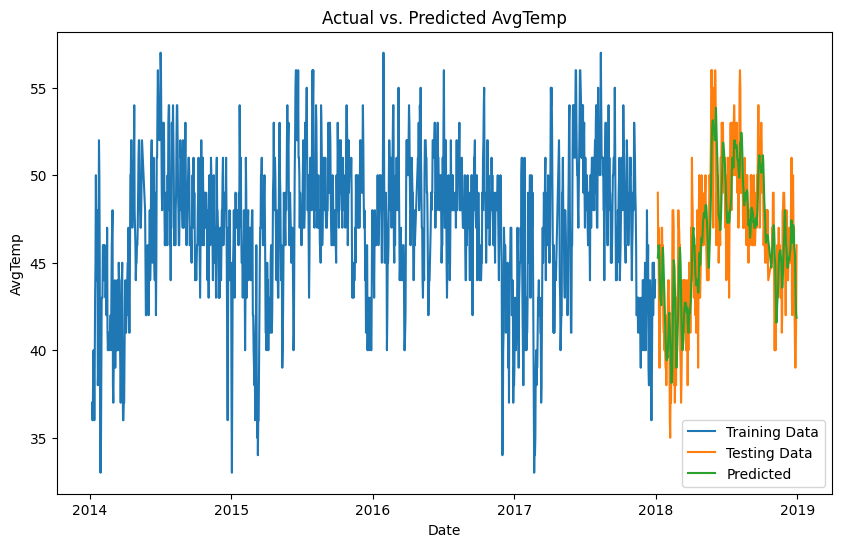

In [8]:
# Call the moving_average_model function to predict the testing data
predicted_values = moving_average_model(train_data, test_data, feature_to_predict, window_size)

# Plot training and testing data with predicted values
plot_actual_vs_predicted(train_data[feature_to_predict], test_data[feature_to_predict], predicted_values, feature_to_predict)

In [9]:
# Calculate RMSE

rmse = np.sqrt(mean_squared_error(test_data[feature_to_predict].iloc[window_size:], predicted_values.iloc[window_size:]))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 2.5597618936887376
